In [1]:
#import library
import pandas as pd 
import numpy as np

In [2]:
#import imdb csv
csv_file = "pd_imdb.csv"
gapminder = pd.read_csv(csv_file)

In [3]:
print(type(gapminder))
gapminder.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,user_name,reviews_title,user_reviews,rank
0,0,MartinHafer,Never dull...but do NOT let your kids watch t...,NAN,10.0
1,1,Leofwine_draca,A new TV classic\n,NAN,10.0
2,2,kosmasp,Just a game\n,"Well multiple games actually, but even that yo...",9.0
3,3,classicsoncall,"""We're in hell here. There's no rules in hell...",NAN,8.0
4,4,lee_eisenberg,"trust me, you have never seen anything like t...","Even if you've seen ""The Hunger Games"" and ""Mo...",10.0


In [4]:
gapminder.tail(5)

,Unnamed: 0,user_name,reviews_title,user_reviews,rank
2250,2250,ferasbob,There is not a second of boredom in tv show\n,NaN,NaN
2251,2251,zinebkarami,Recommended\n,NaN,NaN
2252,2252,mistressbrianna,Absolutely beautiful series\n,NaN,NaN
2253,2253,hiljanenjimi,Overhyped but good\n,NaN,NaN
2254,2254,TheLeroi,Just Questioning Humanity?!\n,NaN,NaN


In [5]:
# check the attribute of database
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2255 non-null   int64  
 1   user_name      2255 non-null   object 
 2   reviews_title  2255 non-null   object 
 3   user_reviews   2081 non-null   object 
 4   rank           2234 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 88.2+ KB


In [6]:
#describe the rank
gapminder.describe()['rank']

count    2234.000000
mean        7.112802
std         2.787887
min         1.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: rank, dtype: float64

<AxesSubplot:>

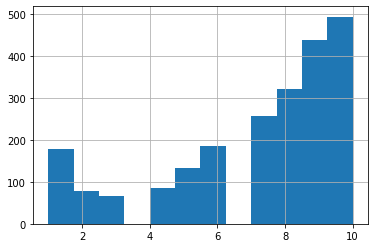

In [7]:
#histogram of ranking
gapminder['rank'].hist(bins=12)

In [8]:
#create df with review's title
df_titles = pd.DataFrame(gapminder['reviews_title'], columns=["reviews_title"])

In [9]:
df_titles.head()

,reviews_title
0,Never dull...but do NOT let your kids watch t...
1,A new TV classic\n
2,Just a game\n
3,"""We're in hell here. There's no rules in hell..."
4,"trust me, you have never seen anything like t..."


In [10]:
# count the char and words of title
df_titles['char_count'] = df_titles['reviews_title'].str.len()  ## this also includes spaces， count the number of words
df_titles['word_count'] = df_titles['reviews_title'].apply(
    lambda ttl: len(str(ttl).split()))

df_titles

,reviews_title,char_count,word_count
0,Never dull...but do NOT let your kids watch t...,55,10
1,A new TV classic\n,18,4
2,Just a game\n,13,3
3,"""We're in hell here. There's no rules in hell...",71,13
4,"trust me, you have never seen anything like t...",50,9
...,...,...,...
2250,There is not a second of boredom in tv show\n,45,10
2251,Recommended\n,13,1
2252,Absolutely beautiful series\n,29,3
2253,Overhyped but good\n,20,3


In [11]:
# drop nan
df_titles = df_titles[ ~ df_titles['reviews_title'].str.contains('NAN') ]

In [12]:
df_titles

,reviews_title,char_count,word_count
0,Never dull...but do NOT let your kids watch t...,55,10
1,A new TV classic\n,18,4
2,Just a game\n,13,3
3,"""We're in hell here. There's no rules in hell...",71,13
4,"trust me, you have never seen anything like t...",50,9
...,...,...,...
2250,There is not a second of boredom in tv show\n,45,10
2251,Recommended\n,13,1
2252,Absolutely beautiful series\n,29,3
2253,Overhyped but good\n,20,3


In [13]:
# converting all letters to lower case
# lambda ttl: " ".join(word.lower() for word in ttl.split())

df_titles['reviews_title'] = df_titles['reviews_title'].apply(
    lambda ttl: " ".join(wrd.lower() for wrd in ttl.split()))
df_titles['reviews_title'].head()

0    never dull...but do not let your kids watch th...
1                                     a new tv classic
2                                          just a game
3    "we're in hell here. there's no rules in hell!...
4     trust me, you have never seen anything like this
Name: reviews_title, dtype: object

In [14]:
# removing all punctuations, which are specified with regular expression "[^\w\s]"

df_titles['reviews_title'] = df_titles['reviews_title'].str.replace('[^\w\s]', '')
df_titles['reviews_title'].head()

# replace pountuation to nothing

/var/folders/_y/lzqhs5394mz4mb9gx_dgt6vw0000gn/T/ipykernel_17741/432442700.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_titles['reviews_title'] = df_titles['reviews_title'].str.replace('[^\w\s]', '')


0    never dullbut do not let your kids watch this one
1                                     a new tv classic
2                                          just a game
3    were in hell here theres no rules in hell  deo...
4      trust me you have never seen anything like this
Name: reviews_title, dtype: object

In [16]:
#create a list include 'squid','game'
squid=['squid','game']

In [17]:
# def func to remove "squid", "game"

df_titles['reviews_title'] = df_titles['reviews_title'].apply(
    lambda ttl: " ".join(wrd for wrd in ttl.split() if wrd not in squid))
df_titles['reviews_title'].head()

0    never dullbut do not let your kids watch this one
1                                     a new tv classic
2                                               just a
3    were in hell here theres no rules in hell deok...
4      trust me you have never seen anything like this
Name: reviews_title, dtype: object

In [18]:
#create df with review

df_reviews = pd.DataFrame(gapminder['user_reviews'], columns=["user_reviews"])


In [19]:
df_reviews.head()

,user_reviews
0,NAN
1,NAN
2,"Well multiple games actually, but even that yo..."
3,NAN
4,"Even if you've seen ""The Hunger Games"" and ""Mo..."


In [20]:
df_reviews.dropna

<bound method DataFrame.dropna of                                            user_reviews
0                                                   NAN
1                                                   NAN
2     Well multiple games actually, but even that yo...
3                                                   NAN
4     Even if you've seen "The Hunger Games" and "Mo...
...                                                 ...
2250                                                NaN
2251                                                NaN
2252                                                NaN
2253                                                NaN
2254                                                NaN

[2255 rows x 1 columns]>

In [21]:
# count the char and words of title
df_reviews['char_count'] = df_reviews['user_reviews'].str.len()  ## this also includes spaces， count the number of words
df_reviews['word_count'] = df_reviews['user_reviews'].apply(
    lambda ttl: len(str(ttl).split()))

df_reviews

,user_reviews,char_count,word_count
0,NAN,3.0,1
1,NAN,3.0,1
2,"Well multiple games actually, but even that yo...",803.0,158
3,NAN,3.0,1
4,"Even if you've seen ""The Hunger Games"" and ""Mo...",349.0,61
...,...,...,...
2250,NaN,NaN,1
2251,NaN,NaN,1
2252,NaN,NaN,1
2253,NaN,NaN,1


In [22]:
df_reviews['str'] = str(df_reviews['user_reviews'])

In [23]:
# drop nan
df_reviews = df_reviews[ ~ df_reviews['user_reviews'].str.contains('NAN',na=False) ]

In [24]:
searchfor = ['NAN', 'NaN']
df_reviews = df_reviews[~df_reviews['user_reviews'].str.contains('|'.join(searchfor),na=False)]

In [25]:
df_reviews

,user_reviews,char_count,word_count,str
2,"Well multiple games actually, but even that yo...",803.0,158,0 ...
4,"Even if you've seen ""The Hunger Games"" and ""Mo...",349.0,61,0 ...
6,Exciting show that keeps you watching. The Kor...,483.0,81,0 ...
7,I loved it but three last episodes killed the ...,51.0,10,0 ...
9,"Greetings from Lithuania.I liked and enjoyed ""...",625.0,108,0 ...
...,...,...,...,...
2250,NaN,NaN,1,0 ...
2251,NaN,NaN,1,0 ...
2252,NaN,NaN,1,0 ...
2253,NaN,NaN,1,0 ...


In [26]:
df_reviews = df_reviews.drop(df_reviews[df_reviews['word_count']==1].index)

In [27]:
df_reviews

,user_reviews,char_count,word_count,str
2,"Well multiple games actually, but even that yo...",803.0,158,0 ...
4,"Even if you've seen ""The Hunger Games"" and ""Mo...",349.0,61,0 ...
6,Exciting show that keeps you watching. The Kor...,483.0,81,0 ...
7,I loved it but three last episodes killed the ...,51.0,10,0 ...
9,"Greetings from Lithuania.I liked and enjoyed ""...",625.0,108,0 ...
...,...,...,...,...
2076,I really enjoy every second of this TV show it...,97.0,20,0 ...
2077,I like it so so much ... It was the first to e...,160.0,38,0 ...
2078,This series is beautifully produced and direct...,289.0,47,0 ...
2079,Its far from bad and definitely worth watching...,183.0,31,0 ...


In [28]:
# converting all letters to lower case
# lambda ttl: " ".join(word.lower() for word in ttl.split())

df_reviews['user_reviews'] = df_reviews['user_reviews'].apply(
    lambda ttl: " ".join(wrd.lower() for wrd in ttl.split()))
df_reviews['user_reviews'].head()

2    well multiple games actually, but even that yo...
4    even if you've seen "the hunger games" and "mo...
6    exciting show that keeps you watching. the kor...
7    i loved it but three last episodes killed the ...
9    greetings from lithuania.i liked and enjoyed "...
Name: user_reviews, dtype: object

In [29]:
# removing all punctuations, which are specified with regular expression "[^\w\s]"

df_reviews['user_reviews'] = df_reviews['user_reviews'].str.replace('[^\w\s]', '')
df_reviews['user_reviews'].head()

# replace pountuation to nothing

/var/folders/_y/lzqhs5394mz4mb9gx_dgt6vw0000gn/T/ipykernel_17741/1722553863.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews['user_reviews'] = df_reviews['user_reviews'].str.replace('[^\w\s]', '')


2    well multiple games actually but even that you...
4    even if youve seen the hunger games and money ...
6    exciting show that keeps you watching the kore...
7    i loved it but three last episodes killed the ...
9    greetings from lithuaniai liked and enjoyed sq...
Name: user_reviews, dtype: object

In [30]:
# def func to drop "squid game"

df_reviews['user_reviews']  = df_reviews['user_reviews'] .apply(
    lambda ttl: " ".join(wrd for wrd in ttl.split() if wrd not in squid))
df_reviews['user_reviews'] .head()

2    well multiple games actually but even that you...
4    even if youve seen the hunger games and money ...
6    exciting show that keeps you watching the kore...
7    i loved it but three last episodes killed the ...
9    greetings from lithuaniai liked and enjoyed 20...
Name: user_reviews, dtype: object

In [31]:

df_reviews.head()

,user_reviews,char_count,word_count,str
2,well multiple games actually but even that you...,803.0,158,0 ...
4,even if youve seen the hunger games and money ...,349.0,61,0 ...
6,exciting show that keeps you watching the kore...,483.0,81,0 ...
7,i loved it but three last episodes killed the ...,51.0,10,0 ...
9,greetings from lithuaniai liked and enjoyed 20...,625.0,108,0 ...


In [32]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kawanwong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# removing stop words

from nltk.corpus import stopwords

stop = stopwords.words('english')

In [34]:
# show stopwords
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
# def func

df_titles['reviews_title'] = df_titles['reviews_title'].apply(
    lambda ttl: " ".join(wrd for wrd in ttl.split() if wrd not in stop))
df_titles['reviews_title'].head()

0           never dullbut let kids watch one
1                             new tv classic
2                                           
3    hell theres rules hell deoksu episode 7
4             trust never seen anything like
Name: reviews_title, dtype: object

In [36]:
#df_reviews['user_reviews']
df_reviews['user_reviews'] = df_reviews['user_reviews'].apply(
    lambda ttl: " ".join(wrd for wrd in ttl.split() if wrd not in stop))
df_reviews['user_reviews'].head()

2    well multiple games actually even may find acc...
4    even youve seen hunger games money heist calle...
6    exciting show keeps watching korean part emoti...
7                loved three last episodes killed vibe
9    greetings lithuaniai liked enjoyed 2021 series...
Name: user_reviews, dtype: object

In [37]:
string = ' '.join(df_titles['reviews_title'])
string

'never dullbut let kids watch one new tv classic  hell theres rules hell deoksu episode 7 trust never seen anything like games die violent funny atypical k drama think good please watch korean movie oldboy 8 started strong ended disoriented good concept solid excecution 10th time father give strength good enough close perfect still amazing perfect beautiful lovely addicting violent implausible oddly engrossing storyline series unique creative spin similar films like battle royale hunger games lord flies fantastic truly unique show true social commentary humanity competition avarice life excellent new korean series concept viewers enjoy highly recommended ruthless addictive korean soap opera meets hunger games pretty good series woouuuughhhhh wrong skeptical tense commentary societys many debts beautiful court calamari squite good childrens games never exciting first half decent feel overstaythe games lost appeals 5th one fun horror show path good parasite violent looks like intense ent

In [38]:
string2 = ' '.join(df_reviews['user_reviews'])
string2

'well multiple games actually even may find accurate may look way games played buzz right youve probably heard quite bit alreadyif like got without spoilers congrats way show able surprise quite times players also even story evolves may end exactly would imagine also seen good thing reckonas fan korean cinema curious anyway dissapoint acting amazing effects great story mature get enough social commentary critique make great watch even youve seen hunger games money heist called ojingeo geim original korean still going shock sad thing many people choice risk everything like characters heredefinitely see youll never look childrens way seeing exciting show keeps watching korean part emotional connection characters financial problems family obligations violence although comically exaggerated unusual k drama good acting lsj phs veteran actors striking set design gives visually glossy look whatever makes international audiences watch k dramas good isnt typical k drama far one best swift watch

In [39]:
lst = string.split()
lst

['never',
 'dullbut',
 'let',
 'kids',
 'watch',
 'one',
 'new',
 'tv',
 'classic',
 'hell',
 'theres',
 'rules',
 'hell',
 'deoksu',
 'episode',
 '7',
 'trust',
 'never',
 'seen',
 'anything',
 'like',
 'games',
 'die',
 'violent',
 'funny',
 'atypical',
 'k',
 'drama',
 'think',
 'good',
 'please',
 'watch',
 'korean',
 'movie',
 'oldboy',
 '8',
 'started',
 'strong',
 'ended',
 'disoriented',
 'good',
 'concept',
 'solid',
 'excecution',
 '10th',
 'time',
 'father',
 'give',
 'strength',
 'good',
 'enough',
 'close',
 'perfect',
 'still',
 'amazing',
 'perfect',
 'beautiful',
 'lovely',
 'addicting',
 'violent',
 'implausible',
 'oddly',
 'engrossing',
 'storyline',
 'series',
 'unique',
 'creative',
 'spin',
 'similar',
 'films',
 'like',
 'battle',
 'royale',
 'hunger',
 'games',
 'lord',
 'flies',
 'fantastic',
 'truly',
 'unique',
 'show',
 'true',
 'social',
 'commentary',
 'humanity',
 'competition',
 'avarice',
 'life',
 'excellent',
 'new',
 'korean',
 'series',
 'concept',


In [40]:
lst2 = string2.split()
lst2

['well',
 'multiple',
 'games',
 'actually',
 'even',
 'may',
 'find',
 'accurate',
 'may',
 'look',
 'way',
 'games',
 'played',
 'buzz',
 'right',
 'youve',
 'probably',
 'heard',
 'quite',
 'bit',
 'alreadyif',
 'like',
 'got',
 'without',
 'spoilers',
 'congrats',
 'way',
 'show',
 'able',
 'surprise',
 'quite',
 'times',
 'players',
 'also',
 'even',
 'story',
 'evolves',
 'may',
 'end',
 'exactly',
 'would',
 'imagine',
 'also',
 'seen',
 'good',
 'thing',
 'reckonas',
 'fan',
 'korean',
 'cinema',
 'curious',
 'anyway',
 'dissapoint',
 'acting',
 'amazing',
 'effects',
 'great',
 'story',
 'mature',
 'get',
 'enough',
 'social',
 'commentary',
 'critique',
 'make',
 'great',
 'watch',
 'even',
 'youve',
 'seen',
 'hunger',
 'games',
 'money',
 'heist',
 'called',
 'ojingeo',
 'geim',
 'original',
 'korean',
 'still',
 'going',
 'shock',
 'sad',
 'thing',
 'many',
 'people',
 'choice',
 'risk',
 'everything',
 'like',
 'characters',
 'heredefinitely',
 'see',
 'youll',
 'never',


In [41]:
srs = pd.Series(lst)
srs

0             never
1           dullbut
2               let
3              kids
4             watch
           ...     
6693         series
6694      overhyped
6695           good
6696    questioning
6697       humanity
Length: 6698, dtype: object

In [42]:
srs2 = pd.Series(lst2)
srs2

0            well
1        multiple
2           games
3        actually
4            even
           ...   
45860        time
45861     content
45862        made
45863       movie
45864      longer
Length: 45865, dtype: object

In [43]:
srs.value_counts()

show           230
good           172
great          158
series         142
best            86
              ... 
spine            1
lives            1
disgusting       1
stylish          1
questioning      1
Length: 1890, dtype: int64

In [44]:
srs2.value_counts()

show         850
series       781
watch        480
good         442
like         391
            ... 
feet           1
trimmed        1
sinks          1
swims          1
endingand      1
Length: 7272, dtype: int64

In [45]:
# common word screening (can determine to remove these words or not)
freq_common = srs.value_counts()[:10]

In [46]:
freq_common_2 = srs2.value_counts()[:10]

In [47]:
# equivalent to 
freq_common = pd.Series(' '.join(
    df_titles['reviews_title']).split()).value_counts()[:20]
freq_common
# df_titles['titles']).split()).value_counts()[-10] :last 10
# let's retain them for this example

show           230
good           172
great          158
series         142
best            86
watch           83
overrated       81
amazing         68
one             64
korean          58
hype            55
bad             50
ending          45
worth           45
predictable     43
dont            42
time            39
acting          38
games           37
story           36
dtype: int64

In [48]:
# equivalent to 
freq_common_2 = pd.Series(' '.join(
    df_reviews['user_reviews']).split()).value_counts()[:20]
freq_common_2
# df_titles['titles']).split()).value_counts()[-10] :last 10
# let's retain them for this example

show          850
series        781
watch         480
good          442
like          391
acting        386
really        386
one           362
episode       325
great         317
story         298
korean        286
people        274
characters    270
dont          266
watching      251
games         249
first         210
season        208
much          206
dtype: int64

In [49]:
# rare words removal
freq_rare = pd.Series(' '.join(
    df_titles['reviews_title']).split()).value_counts()[-10:]
freq_rare

# not bad. let's retain them for this example

ott            1
guessing       1
intresting     1
portrayal      1
inaccurate     1
spine          1
lives          1
disgusting     1
stylish        1
questioning    1
dtype: int64

In [50]:
# rare words removal
freq_rare_2 = pd.Series(' '.join(
    df_reviews['user_reviews']).split()).value_counts()[-10:]
freq_rare_2

# not bad. let's retain them for this example

tentacles    1
looses       1
midway       1
bite         1
cram         1
feet         1
trimmed      1
sinks        1
swims        1
endingand    1
dtype: int64

In [51]:
# removing non-English characters


def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)


df_titles['reviews_title'] = df_titles['reviews_title'].apply(remove_non_ascii)

In [52]:
# removing non-English characters


def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)


df_reviews['user_reviews'] = df_reviews['user_reviews'].apply(remove_non_ascii)

In [53]:
# tokenization - 分词
# It is the process of a converting a text in tokens(words or entities 
# present in the text) as it becomes easy to perform the other preprocessing steps.

from textblob import TextBlob

TextBlob(df_titles['reviews_title'][0]).words

WordList(['never', 'dullbut', 'let', 'kids', 'watch', 'one'])

In [54]:
df_reviews['user_reviews']

2       well multiple games actually even may find acc...
4       even youve seen hunger games money heist calle...
6       exciting show keeps watching korean part emoti...
7                   loved three last episodes killed vibe
9       greetings lithuaniai liked enjoyed 2021 series...
                              ...                        
2076    really enjoy every second tv show perfect amaz...
2077    like much first end first day think season 2 b...
2078    series beautifully produced directed many stor...
2079    far bad definitely worth watching scenes show ...
2080    amount violence movie every kind people crimin...
Name: user_reviews, Length: 1640, dtype: object

In [55]:
# TF
tf1 = df_titles['reviews_title'].apply(lambda x: pd.value_counts(x.split(" "))).sum(
    axis=0).reset_index()

tf1.columns = ['words', 'tf']
tf1.sort_values(['tf'], ascending=False).head(20)

,words,tf
71,show,230.0
28,good,172.0
136,great,158.0
58,series,142.0
169,best,86.0
4,watch,83.0
236,overrated,81.0
50,amazing,68.0
5,one,64.0
30,korean,58.0


In [56]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [57]:
# Import the required libraries
from nltk.corpus import movie_reviews

# Load positive and negative reviews  
import nltk
nltk.download('movie_reviews')

# get all positive and negative file ids
positive_fileids = movie_reviews.fileids('pos')
negative_fileids = movie_reviews.fileids('neg')

# display the words in a positive review
movie_reviews.words('pos/cv004_11636.txt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kawanwong/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


['moviemaking', 'is', 'a', 'lot', 'like', 'being', ...]

In [58]:
# Define a function to extract features. It returns a dictionary containing all words in a
# document as keys and 'True' for their values
def extract_features(word_list):
    return dict([(word, True) for word in word_list])

# Extract features for the positive and negative reviews
features_positive = [(extract_features(movie_reviews.words(fileids=[f])),
                      'Positive') for f in positive_fileids]
features_negative = [(extract_features(movie_reviews.words(fileids=[f])),
                      'Negative') for f in negative_fileids]

# Take a look at an input feature
print(features_positive[10])


({'after': True, 'watching': True, '"': True, 'rat': True, 'race': True, 'last': True, 'week': True, ',': True, 'i': True, 'noticed': True, 'my': True, 'cheeks': True, 'were': True, 'sore': True, 'and': True, 'realized': True, 'that': True, 'when': True, 'not': True, 'laughing': True, 'aloud': True, 'had': True, 'held': True, 'a': True, 'grin': True, 'for': True, 'virtually': True, 'all': True, 'of': True, 'the': True, 'film': True, "'": True, 's': True, '112': True, 'minutes': True, '.': True, 'saturday': True, 'night': True, 'attended': True, 'another': True, 'sneak': True, 'preview': True, 'movie': True, 'damned': True, 'if': True, 'didn': True, 't': True, 'enjoy': True, 'it': True, 'as': True, 'much': True, 'second': True, 'time': True, 'first': True, 'is': True, 'great': True, 'goofy': True, 'delight': True, 'dandy': True, 'mix': True, 'energetic': True, 'performances': True, 'inspired': True, 'sight': True, 'gags': True, 'flat': True, '-': True, 'out': True, 'silliness': True, 'h

In [59]:
print(features_negative[10])

({'best': True, 'remembered': True, 'for': True, 'his': True, 'understated': True, 'performance': True, 'as': True, 'dr': True, '.': True, 'hannibal': True, 'lecter': True, 'in': True, 'michael': True, 'mann': True, "'": True, 's': True, 'forensics': True, 'thriller': True, ',': True, 'manhunter': True, 'scottish': True, 'character': True, 'actor': True, 'brian': True, 'cox': True, 'brings': True, 'something': True, 'special': True, 'to': True, 'every': True, 'movie': True, 'he': True, 'works': True, 'on': True, 'usually': True, 'playing': True, 'a': True, 'bit': True, 'role': True, 'some': True, 'studio': True, 'schlock': True, '(': True, 'dies': True, 'halfway': True, 'through': True, 'the': True, 'long': True, 'kiss': True, 'goodnight': True, ')': True, 'only': True, 'occasionally': True, 'given': True, 'meaty': True, 'and': True, 'substantial': True, 'do': True, 'if': True, 'you': True, 'want': True, 'see': True, 'brilliant': True, 'acting': True, 'check': True, 'out': True, 'work'

In [60]:
#Split the data into train and test in an 80-20 ratio. W
threshold_factor = 0.8

threshold_positive = int(threshold_factor * len(features_positive))
threshold_negative = int(threshold_factor * len(features_negative))

In [61]:
# Extract the features for training and test data
features_train = features_positive[:threshold_positive] + features_negative[:threshold_negative]
features_test = features_positive[threshold_positive:] + features_negative[threshold_negative:]  

print("Number of training datapoints:", len(features_train))
print("Number of test datapoints:", len(features_test))

Number of training datapoints: 1600
Number of test datapoints: 400


In [62]:
# Import the required libraries
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

# Train a Naive Bayes classifier
clf = NaiveBayesClassifier.train(features_train)

# Display the accuracy using the test data only
print("Accuracy of the classifier:", nltk.classify.util.accuracy(clf, features_test))

Accuracy of the classifier: 0.735


In [63]:
# Display the 10 most informative words that it obtained during analysis.
# These words basically have a strong say in what’s classified as a positive or a negative review.
print("Top 10 most informative words:")
print()

for item in clf.most_informative_features()[:10]:
    print(item[0])

Top 10 most informative words:

outstanding
insulting
vulnerable
ludicrous
uninvolving
astounding
avoids
fascination
affecting
animators


In [64]:
# In order to see how our classifier performs, let's put some unseen reviews
# into our classifier and see how the classifier processes them

input_reviews = df_titles['reviews_title']

In [65]:
input_reviews_co= df_reviews['user_reviews']

In [66]:
df_titles

,reviews_title,char_count,word_count
0,never dullbut let kids watch one,55,10
1,new tv classic,18,4
2,,13,3
3,hell theres rules hell deoksu episode 7,71,13
4,trust never seen anything like,50,9
...,...,...,...
2250,second boredom tv show,45,10
2251,recommended,13,1
2252,absolutely beautiful series,29,3
2253,overhyped good,20,3


In [67]:
df_reviews

,user_reviews,char_count,word_count,str
2,well multiple games actually even may find acc...,803.0,158,0 ...
4,even youve seen hunger games money heist calle...,349.0,61,0 ...
6,exciting show keeps watching korean part emoti...,483.0,81,0 ...
7,loved three last episodes killed vibe,51.0,10,0 ...
9,greetings lithuaniai liked enjoyed 2021 series...,625.0,108,0 ...
...,...,...,...,...
2076,really enjoy every second tv show perfect amaz...,97.0,20,0 ...
2077,like much first end first day think season 2 b...,160.0,38,0 ...
2078,series beautifully produced directed many stor...,289.0,47,0 ...
2079,far bad definitely worth watching scenes show ...,183.0,31,0 ...


In [68]:
print("Predictions:")
for review in input_reviews:
    
    print("Review:", review)
    probdist = clf.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()
    # Step 11: Print the output:
    print("Predicted sentiment:", pred_sentiment)
    
    print("Probability:", round(probdist.prob(pred_sentiment), 2))
    

Predictions:
Review: never dullbut let kids watch one
Predicted sentiment: Positive
Probability: 0.56
Review: new tv classic
Predicted sentiment: Positive
Probability: 0.56
Review: 
Predicted sentiment: Positive
Probability: 0.5
Review: hell theres rules hell deoksu episode 7
Predicted sentiment: Negative
Probability: 0.68
Review: trust never seen anything like
Predicted sentiment: Positive
Probability: 0.5
Review: games die
Predicted sentiment: Negative
Probability: 0.53
Review: violent funny atypical k drama
Predicted sentiment: Positive
Probability: 0.63
Review: think good please watch korean movie oldboy
Predicted sentiment: Negative
Probability: 0.68
Review: 8
Predicted sentiment: Positive
Probability: 0.67
Review: started strong ended disoriented
Predicted sentiment: Positive
Probability: 0.69
Review: good concept solid excecution
Predicted sentiment: Positive
Probability: 0.71
Review: 10th time father give strength
Predicted sentiment: Negative
Probability: 0.68
Review: good eno

Review: overrated ending s01e08 stupid
Predicted sentiment: Negative
Probability: 0.7
Review: hole search plot
Predicted sentiment: Negative
Probability: 0.51
Review: wow good way
Predicted sentiment: Negative
Probability: 0.67
Review: great shoot korea
Predicted sentiment: Negative
Probability: 0.67
Review: extremely good dark action thriller except one major flaw
Predicted sentiment: Positive
Probability: 0.67
Review: outstanding
Predicted sentiment: Positive
Probability: 0.93
Review: absolute masterpiece
Predicted sentiment: Positive
Probability: 0.82
Review: hell love
Predicted sentiment: Positive
Probability: 0.52
Review: outstanding series captures best features contemporaries
Predicted sentiment: Positive
Probability: 1.0
Review: enjoyed every single one episodes
Predicted sentiment: Positive
Probability: 0.76
Review: excellent series
Predicted sentiment: Positive
Probability: 0.73
Review: magnificent short show
Predicted sentiment: Positive
Probability: 0.91
Review: magnificent

Probability: 0.92
Review: movie pretty good main character maybe stupidest character history tv shows
Predicted sentiment: Negative
Probability: 0.93
Review: creative yet much grounded
Predicted sentiment: Positive
Probability: 0.61
Review: great movie
Predicted sentiment: Positive
Probability: 0.58
Review: time classic unique
Predicted sentiment: Positive
Probability: 0.79
Review: takashis castle story severe consequences
Predicted sentiment: Positive
Probability: 0.89
Review: people pleasing innovation
Predicted sentiment: Negative
Probability: 0.65
Review: instant classic
Predicted sentiment: Positive
Probability: 0.65
Review: worth hype
Predicted sentiment: Positive
Probability: 0.57
Review: awesome
Predicted sentiment: Positive
Probability: 0.69
Review: terrible
Predicted sentiment: Negative
Probability: 0.75
Review: pretty horrible
Predicted sentiment: Negative
Probability: 0.7
Review: amazing
Predicted sentiment: Positive
Probability: 0.63
Review: beyond doubt cult classic
Predi

Predicted sentiment: Positive
Probability: 0.75
Review: good memorable
Predicted sentiment: Positive
Probability: 0.76
Review: worst among genre would say
Predicted sentiment: Negative
Probability: 0.74
Review: best film year
Predicted sentiment: Positive
Probability: 0.61
Review: 
Predicted sentiment: Positive
Probability: 0.5
Review: overrated show ever
Predicted sentiment: Positive
Probability: 0.59
Review: great series bad english actors
Predicted sentiment: Negative
Probability: 0.5
Review: overrated
Predicted sentiment: Positive
Probability: 0.55
Review: one boring shows ever watched
Predicted sentiment: Negative
Probability: 0.64
Review: original compelling
Predicted sentiment: Positive
Probability: 0.73
Review: drivel
Predicted sentiment: Negative
Probability: 0.79
Review: genocide denounce genocide horrifying overreaching bold
Predicted sentiment: Positive
Probability: 0.91
Review: definitely hype substance
Predicted sentiment: Positive
Probability: 0.58
Review: overhyped typi

Review: great somewhat disturbing cant stop watching
Predicted sentiment: Positive
Probability: 0.54
Review: worth hype
Predicted sentiment: Positive
Probability: 0.57
Review: overhyped
Predicted sentiment: Positive
Probability: 0.75
Review: watched one day
Predicted sentiment: Positive
Probability: 0.54
Review: bit ultra violence
Predicted sentiment: Positive
Probability: 0.61
Review: excelent
Predicted sentiment: Positive
Probability: 0.5
Review: overrated
Predicted sentiment: Positive
Probability: 0.55
Review: would 810
Predicted sentiment: Negative
Probability: 0.52
Review: end
Predicted sentiment: Positive
Probability: 0.51
Review: watch show
Predicted sentiment: Positive
Probability: 0.51
Review: best thing watched recent years
Predicted sentiment: Positive
Probability: 0.63
Review: dissapointing
Predicted sentiment: Positive
Probability: 0.62
Review: amazing end
Predicted sentiment: Positive
Probability: 0.63
Review: outstanding
Predicted sentiment: Positive
Probability: 0.93
Re

Predicted sentiment: Negative
Probability: 0.5
Review: entertaining lacks good games
Predicted sentiment: Negative
Probability: 0.56
Review: please watch alice borderland instead
Predicted sentiment: Negative
Probability: 0.52
Review: excellent
Predicted sentiment: Positive
Probability: 0.74
Review: cast list
Predicted sentiment: Positive
Probability: 0.54
Review: hate
Predicted sentiment: Positive
Probability: 0.54
Review: fans
Predicted sentiment: Negative
Probability: 0.51
Review: best lipsync ive ever seen
Predicted sentiment: Positive
Probability: 0.68
Review: surprise
Predicted sentiment: Positive
Probability: 0.56
Review: lacking depth struggle finish 8 episodes
Predicted sentiment: Positive
Probability: 0.89
Review: top class show
Predicted sentiment: Positive
Probability: 0.67
Review: dont waste time watching
Predicted sentiment: Negative
Probability: 0.95
Review: good idea sooooo slow predicatable
Predicted sentiment: Positive
Probability: 0.68
Review: great show vip cast str

In [69]:
print("Predictions:")
for review in input_reviews_co:
    
    print("Review:", review)
    probdist = clf.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()
    # Step 11: Print the output:
    print("Predicted sentiment:", pred_sentiment)
    
    print("Probability:", round(probdist.prob(pred_sentiment), 2))

Predictions:
Review: well multiple games actually even may find accurate may look way games played buzz right youve probably heard quite bit alreadyif like got without spoilers congrats way show able surprise quite times players also even story evolves may end exactly would imagine also seen good thing reckonas fan korean cinema curious anyway dissapoint acting amazing effects great story mature get enough social commentary critique make great watch
Predicted sentiment: Positive
Probability: 1.0
Review: even youve seen hunger games money heist called ojingeo geim original korean still going shock sad thing many people choice risk everything like characters heredefinitely see youll never look childrens way seeing
Predicted sentiment: Positive
Probability: 0.98
Review: exciting show keeps watching korean part emotional connection characters financial problems family obligations violence although comically exaggerated unusual k drama good acting lsj phs veteran actors striking set design 

Predicted sentiment: Positive
Probability: 1.0
Review: mustwatch series unique edge bed right throughout season ending expected interesting cant wait season 2
Predicted sentiment: Positive
Probability: 0.7
Review: takes battle royale hunger games style approach coupled high stakes childrens style games creates intriguing story debt greed shows people change pushed far end loving hating characters surprised plot twists one new favorite shows hope season 2 good better first
Predicted sentiment: Positive
Probability: 1.0
Review: havent seen series please dont ratesaw hype first day came fell love instantly
Predicted sentiment: Negative
Probability: 0.79
Review: show keeps gripped way brilliant concept well acted vips never get connected one character horrible dont get upset one dies like shows
Predicted sentiment: Positive
Probability: 0.97
Review: violence blood gore gratuitous taste story intriguing yet disturbing couldnt stop watching looking forward season 2 even though ill hide eyes 

Predicted sentiment: Negative
Probability: 0.82
Review: started watching show doubts 30 minutes invested storyline could stop watching could certainly best show watched great original storyline talented actors
Predicted sentiment: Positive
Probability: 0.89
Review: could say overly budgeted piece horrid excuse series story isnt original plot dialogue dull boring bad thrilling part episode ends characters unoriginal poorly acted could go tearing eyes anymore waste another thought thisif someone enjoy would like know makes even barely something waste time theres something good cinematography scenes well shot granted feeling real although props involved joy faded away faster began made impossible ever feel immersed worldunwatchable wouldnt recommend
Predicted sentiment: Negative
Probability: 1.0
Review: much say would waste timesome years ago people read fifty shades grey thinking literature watch pretending cinematographythey made amuse naives primitive instinctsps watch eating actually 

Probability: 0.52
Review: idea solid nothing new plenty movies people getting killed killing part wealthy folks vips ruined big portion last three episodes disaster dont understand went poor actors spitting lame lines poor english could introduce serious korean vips last episode disappointing winner known first episode made pointless watch
Predicted sentiment: Negative
Probability: 0.97
Review: one best shows netflix recent times background score amazing
Predicted sentiment: Positive
Probability: 0.9
Review: felt like booked hunger games ali express however show catchy mostly predictible enjoyed watching games emotions end vip bad brings averagegood rating
Predicted sentiment: Positive
Probability: 0.96
Review: started watching episode 1 got halfway turned terrible voice work acting kept reading things good turned back get sucked maybe like train wreck couldnt look away since im left knowing whether even liked gave 5 stars
Predicted sentiment: Negative
Probability: 0.99
Review: besides

Predicted sentiment: Negative
Probability: 0.88
Review: every actor fantastic performance great story great direction best
Predicted sentiment: Positive
Probability: 0.95
Review: interesting movie seems easy yet super tricky favourite part honeycomb
Predicted sentiment: Positive
Probability: 0.51
Review: first episode meeting girl stole money mistake director showed easy could predict happens next last episode many faults enjoyed series hoped scenario would smarter saw
Predicted sentiment: Positive
Probability: 0.82
Review: seriously guys really didnt know behind didnt really figure early leader every plot show outrageously announced directoracting give 5 idea excellent box execution terrible serious mistake let viewer know important plot show first episodei understand folks grades 9 10 believe little repertoire missing
Predicted sentiment: Negative
Probability: 0.93
Review: silly scenario big investment cheesy end please stop comparing casa de papel
Predicted sentiment: Negative
Proba

In [70]:
import csv,re

In [71]:
result = []
for review in input_reviews:
    
    probdist = clf.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()
    # Step 11: Print the output:
    print(pred_sentiment)
    result.append(pred_sentiment)
    



Positive
Positive
Positive
Negative
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Negative
Negative
Positive
Negative
Positive
Positive
Negative
Positive
Negative
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Negative
Negative
Positive
Negative
Positive
Positive
Negative
Positive
P

Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Negative
Negative
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Negative
Positive
Negative
Positive
Positive
Negative
Positive
Negative
Negative
Negative
Positive
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Positive
Positive
Negative
Negative
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Negative
Negative
Negative
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Negative
Negative
P

In [72]:
result_co = []
for review in input_reviews_co:
    
    probdist = clf.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()
    # Step 11: Print the output:
    print(pred_sentiment)
    result_co.append(pred_sentiment)
    

Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Negative
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Negative
Negative
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Negative
P

In [73]:
result

['Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',

In [74]:
result_co

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',

In [75]:
df_titles['sentiment']= result

In [76]:
df_titles

,reviews_title,char_count,word_count,sentiment
0,never dullbut let kids watch one,55,10,Positive
1,new tv classic,18,4,Positive
2,,13,3,Positive
3,hell theres rules hell deoksu episode 7,71,13,Negative
4,trust never seen anything like,50,9,Positive
...,...,...,...,...
2250,second boredom tv show,45,10,Negative
2251,recommended,13,1,Positive
2252,absolutely beautiful series,29,3,Positive
2253,overhyped good,20,3,Positive


In [67]:
a = df_titles['sentiment'].value_counts()
print (a)


Positive    1402
Negative     853
Name: sentiment, dtype: int64


In [77]:
pos = 1402
neg = 853

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


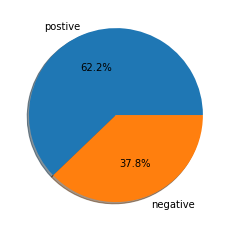

In [78]:
# The percentage for postive songs and negative title
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pie_labels='postive','negative'
plt.pie([pos,neg],labels=pie_labels,autopct='%1.1f%%',shadow=True)

plt.show()

In [79]:
df_reviews['sentiment']= result_co

In [80]:
df_reviews

,user_reviews,char_count,word_count,str,sentiment
2,well multiple games actually even may find acc...,803.0,158,0 ...,Positive
4,even youve seen hunger games money heist calle...,349.0,61,0 ...,Positive
6,exciting show keeps watching korean part emoti...,483.0,81,0 ...,Positive
7,loved three last episodes killed vibe,51.0,10,0 ...,Positive
9,greetings lithuaniai liked enjoyed 2021 series...,625.0,108,0 ...,Positive
...,...,...,...,...,...
2076,really enjoy every second tv show perfect amaz...,97.0,20,0 ...,Positive
2077,like much first end first day think season 2 b...,160.0,38,0 ...,Negative
2078,series beautifully produced directed many stor...,289.0,47,0 ...,Positive
2079,far bad definitely worth watching scenes show ...,183.0,31,0 ...,Negative


In [81]:
b = df_reviews['sentiment'].value_counts()
print (b)

Positive    1039
Negative     601
Name: sentiment, dtype: int64


In [82]:
pos_co = 1013
neg_co = 627

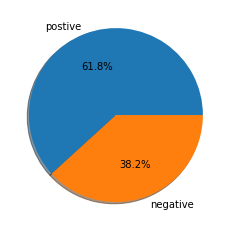

In [83]:
# The percentage for postive songs and negative title
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pie_labels='postive','negative'
plt.pie([pos_co,neg_co],labels=pie_labels,autopct='%1.1f%%',shadow=True)

plt.show()

In [84]:
#gapminder_China = gapminder[gapminder['country'] == 'China']
df_titles_pos = df_titles[df_titles['sentiment'] == 'Positive']

In [85]:
df_titles_pos

,reviews_title,char_count,word_count,sentiment
0,never dullbut let kids watch one,55,10,Positive
1,new tv classic,18,4,Positive
2,,13,3,Positive
4,trust never seen anything like,50,9,Positive
6,violent funny atypical k drama,32,5,Positive
...,...,...,...,...
2249,script writer drank half way director gave com...,75,14,Positive
2251,recommended,13,1,Positive
2252,absolutely beautiful series,29,3,Positive
2253,overhyped good,20,3,Positive


In [86]:
df_titles_neg = df_titles[df_titles['sentiment'] == 'Negative']

In [87]:
df_titles_neg

,reviews_title,char_count,word_count,sentiment
3,hell theres rules hell deoksu episode 7,71,13,Negative
5,games die,18,4,Negative
7,think good please watch korean movie oldboy,65,12,Negative
11,10th time father give strength,41,7,Negative
12,good enough,13,2,Negative
...,...,...,...,...
2237,best kdrama world cant wait season 2,52,11,Negative
2243,great storyline bad acting,32,5,Negative
2247,boring,8,1,Negative
2248,disappointing uneventful,30,3,Negative


In [88]:
string_neg_ti = ' '.join(df_titles_neg['reviews_title'])
string_neg_ti

'hell theres rules hell deoksu episode 7 games die think good please watch korean movie oldboy 10th time father give strength good enough pretty good series squite good path good parasite violent looks like good beginning stupid gets better good original tv show wow great concept bad acting get series obvious becomes doppelganger animal world wellacted engrossing writing little sloppy pretentious ep 3 multiple attempts get going except last episode innovative concept finished bit hastily offence defence two thirds great one third drab everything korea interesting anything hollywood good pressure another korean hit bad taste violence porn kaiji ripoff alright straight 10 tvs next obsession fantastic wheres lee byunghun credit imdb enthralling entertaining experience watch original korean dialogue original watchable maybe greatif watch reverse went problems got good bad ugly happily bandwagon second half dumb silly avoid spoilers otherwise show falls apart completely real page turner boo

In [89]:
string_pos_ti = ' '.join(df_titles_pos['reviews_title'])
string_pos_ti

'never dullbut let kids watch one new tv classic  trust never seen anything like violent funny atypical k drama 8 started strong ended disoriented good concept solid excecution close perfect still amazing perfect beautiful lovely addicting violent implausible oddly engrossing storyline series unique creative spin similar films like battle royale hunger games lord flies fantastic truly unique show true social commentary humanity competition avarice life excellent new korean series concept viewers enjoy highly recommended ruthless addictive korean soap opera meets hunger games woouuuughhhhh wrong skeptical tense commentary societys many debts beautiful court calamari childrens games never exciting first half decent feel overstaythe games lost appeals 5th one fun horror show intense entertaining thriller life greed writing steals limelight starts amazing ep05 loses drive didnt understand excellent series overall excellent series hidden gem nice tv show great moments great addictive netfli

In [90]:
lst_neg_ti = string_neg_ti .split()

In [91]:
lst_pos_ti = string_pos_ti .split()

In [92]:
srs_neg_ti = pd.Series(lst_neg_ti )

In [93]:
srs_pos_ti = pd.Series(lst_pos_ti )

In [94]:
srs_neg_ti.value_counts()

good          102
show           76
bad            47
series         43
dont           39
             ... 
inaccurate      1
portrayal       1
guessing        1
version         1
boredom         1
Length: 959, dtype: int64

In [95]:
# common word screening (can determine to remove these words or not)
freq_common_neg_ti = srs_neg_ti.value_counts()[:20]
freq_common_neg_ti

good           102
show            76
bad             47
series          43
dont            39
predictable     39
great           35
wow             31
boring          30
acting          29
hype            27
ending          25
time            22
plot            20
watch           20
idea            19
vips            19
vip             19
get             17
really          17
dtype: int64

In [96]:
srs_pos_ti.value_counts()

show           154
great          123
series          99
best            77
good            70
              ... 
left             1
dullbut          1
lackluster       1
follow           1
questioning      1
Length: 1348, dtype: int64

In [97]:
# common word screening (can determine to remove these words or not)
freq_common_pos_ti = srs_pos_ti.value_counts()[:20]
freq_common_pos_ti

show            154
great           123
series           99
best             77
good             70
overrated        67
watch            63
amazing          56
one              52
korean           42
worth            36
masterpiece      33
overhyped        30
hype             28
story            27
excellent        25
entertaining     25
perfect          25
brilliant        25
games            24
dtype: int64

In [98]:
df_reviews_pos = df_reviews[df_reviews['sentiment'] == 'Positive']
df_reviews_neg = df_reviews[df_reviews['sentiment'] == 'Negative']

In [99]:
df_reviews_pos

,user_reviews,char_count,word_count,str,sentiment
2,well multiple games actually even may find acc...,803.0,158,0 ...,Positive
4,even youve seen hunger games money heist calle...,349.0,61,0 ...,Positive
6,exciting show keeps watching korean part emoti...,483.0,81,0 ...,Positive
7,loved three last episodes killed vibe,51.0,10,0 ...,Positive
9,greetings lithuaniai liked enjoyed 2021 series...,625.0,108,0 ...,Positive
...,...,...,...,...,...
2067,really enjoyed suggest series everyone know pe...,72.0,13,0 ...,Positive
2069,story motif great conversation acting characte...,190.0,33,0 ...,Positive
2071,one best series ive ever watchedi hope gets re...,81.0,15,0 ...,Positive
2076,really enjoy every second tv show perfect amaz...,97.0,20,0 ...,Positive


In [100]:
df_reviews_neg

,user_reviews,char_count,word_count,str,sentiment
26,decent set deco battle royal flavorsa bit long...,157.0,26,0 ...,Negative
30,characters well written sadly cant say story l...,313.0,57,0 ...,Negative
31,entire premise based lets play games played ki...,892.0,163,0 ...,Negative
36,finally wins moneyonly lose 3 seconds later tu...,436.0,80,0 ...,Negative
43,definitely slow burn first 2 episodes give tas...,265.0,50,0 ...,Negative
...,...,...,...,...,...
2074,hype series thought would fantastic series wat...,817.0,158,0 ...,Negative
2075,series nos 1 logic 2 charecterisation 3 thrill...,240.0,48,0 ...,Negative
2077,like much first end first day think season 2 b...,160.0,38,0 ...,Negative
2079,far bad definitely worth watching scenes show ...,183.0,31,0 ...,Negative


In [101]:
string_neg_re = ' '.join(df_reviews_neg['user_reviews'])
string_pos_re = ' '.join(df_reviews_pos['user_reviews'])

In [102]:
lst_neg_re = string_neg_re .split()
lst_pos_re = string_pos_re .split()

In [103]:
srs_neg_re = pd.Series(lst_neg_re )
srs_pos_re = pd.Series(lst_pos_re )

In [104]:
srs_neg_re.value_counts()

show         261
series       230
acting       185
watch        166
dont         165
            ... 
voiced         1
score          1
biasing        1
goat           1
endingand      1
Length: 3707, dtype: int64

In [105]:
srs_pos_re.value_counts()

show                 589
series               551
watch                314
good                 285
one                  257
                    ... 
scalepeople            1
romcom                 1
sawdidnt               1
characterhundreds      1
simulated              1
Length: 5630, dtype: int64

In [106]:
freq_common_neg_re = srs_neg_re.value_counts()[:20]
freq_common_neg_re

show          261
series        230
acting        185
watch         166
dont          165
like          158
good          157
really        140
episode       118
bad           106
one           105
watching      103
people         97
story          97
characters     89
much           88
plot           86
first          84
vips           83
time           83
dtype: int64

In [107]:
freq_common_pos_re = srs_pos_re.value_counts()[:20]
freq_common_pos_re

show          589
series        551
watch         314
good          285
one           257
really        246
great         241
like          233
episode       207
korean        207
acting        201
story         201
games         182
characters    181
people        177
season        159
best          150
watching      148
well          145
actors        133
dtype: int64

In [111]:
df_reviews_pos.to_csv('Postive imdb reviews.csv')

In [112]:
df_reviews_neg.to_csv('Negative imdb reviews.csv')

In [113]:
df_titles_pos.to_csv('Postive imdb title.csv')

In [114]:
df_titles_neg.to_csv('Negative imdb title_update.csv')